In [1]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1-month loan

In [2]:
df_1 = pd.read_excel('/Users/binsair/Desktop/FT/rate index/month_1.xlsx')
mask_1 = (df_1['Date'] > '2017-3-31') & (df_1['Date'] <= '2018-3-31')
df_1m = df_1.loc[mask_1]
df_1_avg = df_1m.groupby('Date').apply(lambda x: np.average(x['Rate'], weights=x['Value(Yuan)']))

In [23]:
##all data
df_1_avg = df_1.groupby('Date').apply(lambda x: np.average(x['Rate'], weights=x['Value(Yuan)']))

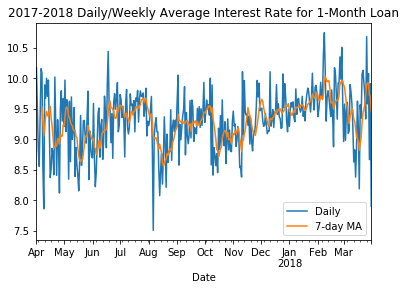

In [3]:
%matplotlib inline
df_1_avg.plot()
ma_7 = df_1_avg.rolling(window=7).mean()
ma_7.plot()
plt.legend(['Daily', '7-day MA'], loc='best')
plt.title('2017-2018 Daily/Weekly Average Interest Rate for 1-Month Loan')
plt.savefig('One-Month Loan_1.png', bbox_inches='tight')

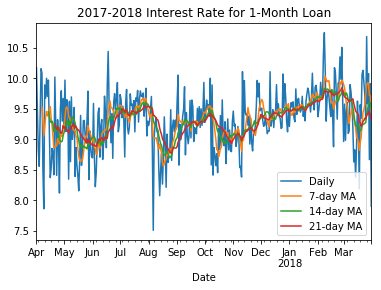

In [4]:
#mask_1 = (df_1['Date'] > '2016-3-31') & (df_1['Date'] <= '2018-3-31')
#df_1m = df_1.loc[mask_1]
#df_1_avg = df_1m.groupby('Date').apply(lambda x: np.average(x['Rate'], weights=x['Value(Yuan)']))
%matplotlib inline
df_1_avg.plot()
ma_7 = df_1_avg.rolling(window=7).mean()
ma_7.plot()
ma_14 = df_1_avg.rolling(window=14).mean()
ma_14.plot()
ma_21 = df_1_avg.rolling(window=21).mean()
ma_21.plot()
plt.legend(['Daily', '7-day MA', '14-day MA', '21-day MA'], loc='best')
plt.title('2017-2018 Interest Rate for 1-Month Loan')
plt.savefig('One-Month Loan_2.png', bbox_inches='tight')

In [5]:
df_sh = pd.read_excel('/Users/binsair/Desktop/FT/rate index/Shibor.xlsx')
df_sh.index = df_sh['Date']


In [24]:
df_1_avg = df_1_avg.to_frame().reset_index()
df_1_avg.columns = ['Date', 'Rate']

In [25]:
df_1_avg.to_csv('1_month_loan', sep='\t')

In [6]:

df_sh_1_avg = df_1_avg.merge(df_sh)
df_sh_1_avg.index = df_sh_1_avg['Date']

In [7]:
##Shibor rates
sh_6 = df_sh_1_avg['Shanghai Interbank Offered Rate (SHIBOR): 6 Month']
sh_12 = df_sh_1_avg['Shanghai Interbank Offered Rate (SHIBOR): 1Year']
sh_3 = df_sh_1_avg['Shanghai Interbank Offered Rate (SHIBOR): 3 Month']
sh_1 = df_sh_1_avg['Shanghai Interbank Offered Rate (SHIBOR): 1 Month']

In [8]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

In [9]:
xcov_monthly = [crosscorr(sh_6, df_sh_1_avg['Rate'].rolling(window=7).mean(), lag=i)\
                for i in range(10)]

In [10]:
xcov_monthly##corr = 0.506

[0.50562946337552672,
 0.49074952328108989,
 0.47673990673627992,
 0.46471238152945338,
 0.45434917357497739,
 0.44733153541165727,
 0.4406636705081256,
 0.43678652421260833,
 0.43373152275609078,
 0.43069688712418919]

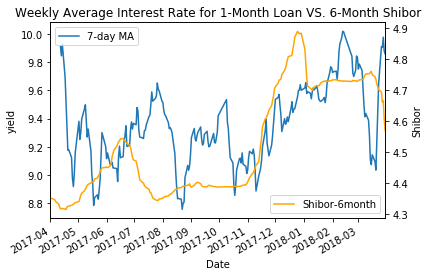

In [11]:
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()


#df_1_avg.plot(ax=ax1, y='Rate', legend=True)
ma_7 = df_sh_1_avg['Rate'].rolling(window=7).mean()
ma_7.plot(ax=ax1, y='Rate', legend=True)
ax1.legend(['7-day MA'], loc='upper left')
#sh_7_rolling = sh_7.rolling(window=3).mean()
#sh_7_rolling.plot(ax=ax2, y='Shibor', legend=True,color='orange')
sh_6.plot(ax=ax2, y='Shibor', legend=True,color='orange')
ax2.legend(['Shibor-6month'], loc='lower right')
plt.title('Weekly Average Interest Rate for 1-Month Loan VS. 6-Month Shibor')
ax1.set_ylabel('yield')
ax2.set_ylabel('Shibor')
plt.savefig('One-Month Loan_3.png', bbox_inches='tight')

3-month loan

In [11]:
df_23 = pd.read_excel('/Users/binsair/Desktop/FT/rate index/month_23.xlsx')
mask_23 = (df_23['Date'] > '2017-3-31') & (df_23['Date'] <= '2018-3-31')
df_23m = df_23.loc[mask_23]
df_23_avg = df_23m.groupby('Date').apply(lambda x: np.average(x['Rate'], weights=x['Value(Yuan)']))

In [26]:
#all data
df_23_avg = df_23.groupby('Date').apply(lambda x: np.average(x['Rate'], weights=x['Value(Yuan)']))

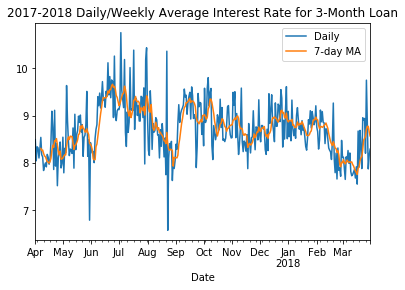

In [13]:
%matplotlib inline
df_23_avg.plot()
ma_7 = df_23_avg.rolling(window=7).mean()
ma_7.plot()
plt.legend(['Daily', '7-day MA'], loc='best')
plt.title('2017-2018 Daily/Weekly Average Interest Rate for 3-Month Loan')
plt.savefig('three-Month Loan_1.png', bbox_inches='tight')

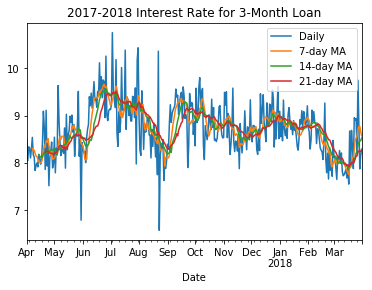

In [14]:
%matplotlib inline
df_23_avg.plot()
ma_7 = df_23_avg.rolling(window=7).mean()
ma_7.plot()
ma_14 = df_23_avg.rolling(window=14).mean()
ma_14.plot()
ma_21 = df_23_avg.rolling(window=21).mean()
ma_21.plot()
plt.legend(['Daily', '7-day MA', '14-day MA', '21-day MA'], loc='best')
plt.title('2017-2018 Interest Rate for 3-Month Loan')
plt.savefig('three-Month Loan_2.png', bbox_inches='tight')

In [27]:
df_23_avg = df_23_avg.to_frame().reset_index()
df_23_avg.columns = ['Date', 'Rate']

In [28]:
df_23_avg.to_csv('3_month_loan', sep='\t')

In [10]:

df_sh_23_avg = df_23_avg.merge(df_sh)
df_sh_23_avg.index = df_sh_23_avg['Date']

NameError: name 'df_sh' is not defined

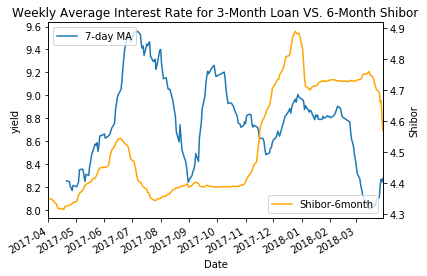

In [16]:
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()


#df_1_avg.plot(ax=ax1, y='Rate', legend=True)
ma_7 = df_sh_23_avg['Rate'].rolling(window=14).mean()
ma_7.plot(ax=ax1, y='Rate', legend=True)
ax1.legend(['7-day MA'], loc='upper left')
#sh_7_rolling = sh_7.rolling(window=3).mean()
#sh_7_rolling.plot(ax=ax2, y='Shibor', legend=True,color='orange')
sh_6.plot(ax=ax2, y='Shibor', legend=True,color='orange')
ax2.legend(['Shibor-6month'], loc='lower right')
plt.title('Weekly Average Interest Rate for 3-Month Loan VS. 6-Month Shibor')
ax1.set_ylabel('yield')
ax2.set_ylabel('Shibor')
plt.savefig('three-Month Loan_3.png', bbox_inches='tight')

In [17]:
xcov_monthly = [crosscorr(sh_6, df_sh_23_avg['Rate'].rolling(window=7).mean(), lag=i)\
                for i in range(10)]

In [18]:
xcov_monthly ##not correlated

[-0.13360396801645411,
 -0.14391433552885452,
 -0.15474722650770567,
 -0.1647704096928029,
 -0.1737581300700437,
 -0.18213168306317296,
 -0.19018380940370663,
 -0.19885098510552182,
 -0.20672792898883033,
 -0.21474678163137598]

6-month loan

In [14]:
df_46 = pd.read_excel('/Users/binsair/Desktop/FT/rate index/month_46.xlsx')
mask_46 = (df_46['Date'] > '2017-3-31') & (df_46['Date'] <= '2018-3-31')
df_46m = df_46.loc[mask_46]
df_46_avg = df_46m.groupby('Date').apply(lambda x: np.average(x['Rate'], weights=x['Value(Yuan)']))

In [29]:
#all data
df_46_avg = df_46.groupby('Date').apply(lambda x: np.average(x['Rate'], weights=x['Value(Yuan)']))

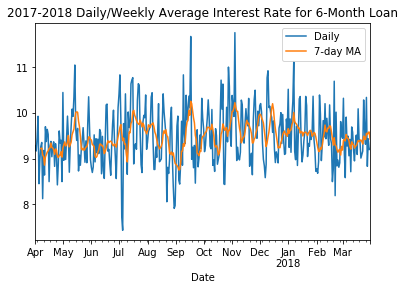

In [20]:
%matplotlib inline
df_46_avg.plot()
ma_7 = df_46_avg.rolling(window=7).mean()
ma_7.plot()
plt.legend(['Daily', '7-day MA'], loc='best')
plt.title('2017-2018 Daily/Weekly Average Interest Rate for 6-Month Loan')
plt.savefig('six-Month Loan_1.png', bbox_inches='tight')

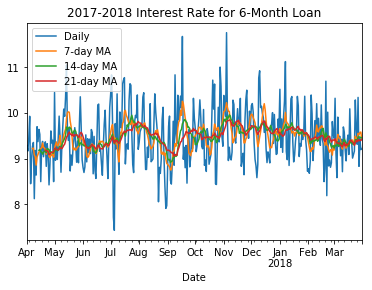

In [21]:
%matplotlib inline
df_46_avg.plot()
ma_7 = df_46_avg.rolling(window=7).mean()
ma_7.plot()
ma_14 = df_46_avg.rolling(window=14).mean()
ma_14.plot()
ma_21 = df_46_avg.rolling(window=21).mean()
ma_21.plot()
plt.legend(['Daily', '7-day MA', '14-day MA', '21-day MA'], loc='best')
plt.title('2017-2018 Interest Rate for 6-Month Loan')
plt.savefig('Six-Month Loan_2.png', bbox_inches='tight')

In [30]:
df_46_avg = df_46_avg.to_frame().reset_index()
df_46_avg.columns = ['Date', 'Rate']

In [31]:
df_46_avg.to_csv('6_month_loan', sep='\t')

In [22]:

df_sh_46_avg = df_46_avg.merge(df_sh)
df_sh_46_avg.index = df_sh_46_avg['Date']

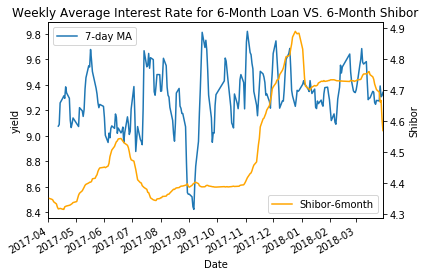

In [23]:
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()


#df_1_avg.plot(ax=ax1, y='Rate', legend=True)
ma_7 = df_sh_46_avg['Rate'].rolling(window=7).mean()
ma_7.plot(ax=ax1, y='Rate', legend=True)
ax1.legend(['7-day MA'], loc='upper left')
#sh_7_rolling = sh_7.rolling(window=3).mean()
#sh_7_rolling.plot(ax=ax2, y='Shibor', legend=True,color='orange')
sh_6.plot(ax=ax2, y='Shibor', legend=True,color='orange')
ax2.legend(['Shibor-6month'], loc='lower right')
plt.title('Weekly Average Interest Rate for 6-Month Loan VS. 6-Month Shibor')
ax1.set_ylabel('yield')
ax2.set_ylabel('Shibor')
plt.savefig('Six-Month Loan_3.png', bbox_inches='tight')

In [24]:
[crosscorr(sh_6, df_sh_46_avg['Rate'].rolling(window=7).mean(), lag=i)\
                for i in range(10)]##not very correlated

[0.22133796916183687,
 0.22633500863576711,
 0.23126256768768103,
 0.23790536431205278,
 0.24666860164742141,
 0.25857832844071377,
 0.2723579426177784,
 0.28605551240313687,
 0.2976481748741156,
 0.30637817173516319]

1-year loan

In [17]:
df_712 = pd.read_excel('/Users/binsair/Desktop/FT/rate index/month_712.xlsx')
mask_712 = (df_712['Date'] > '2017-3-31') & (df_712['Date'] <= '2018-3-31')
df_712m = df_712.loc[mask_712]
df_712_avg = df_712m.groupby('Date').apply(lambda x: np.average(x['Rate'], weights=x['Value(Yuan)']))

In [32]:
#all data
df_712_avg = df_712.groupby('Date').apply(lambda x: np.average(x['Rate'], weights=x['Value(Yuan)']))

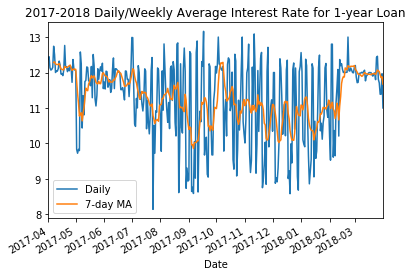

In [26]:
%matplotlib inline
df_712_avg.plot()
ma_7 = df_712_avg.rolling(window=7).mean()
ma_7.plot()
plt.legend(['Daily', '7-day MA'], loc='best')
plt.title('2017-2018 Daily/Weekly Average Interest Rate for 1-year Loan')
plt.savefig('12-Month Loan_1.png', bbox_inches='tight')

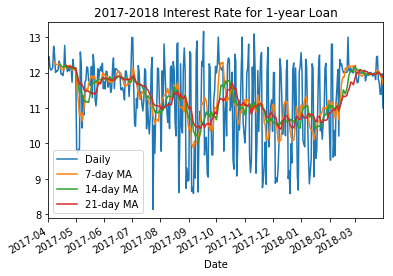

In [27]:
%matplotlib inline
df_712_avg.plot()
ma_7 = df_712_avg.rolling(window=7).mean()
ma_7.plot()
ma_14 = df_712_avg.rolling(window=14).mean()
ma_14.plot()
ma_21 = df_712_avg.rolling(window=21).mean()
ma_21.plot()
plt.legend(['Daily', '7-day MA', '14-day MA', '21-day MA'], loc='best')
plt.title('2017-2018 Interest Rate for 1-year Loan')
plt.savefig('12-Month Loan_2.png', bbox_inches='tight')

In [33]:
df_712_avg = df_712_avg.to_frame().reset_index()
df_712_avg.columns = ['Date', 'Rate']

In [34]:
df_712_avg.to_csv('1_year_loan', sep='\t')

In [28]:

df_sh_712_avg = df_712_avg.merge(df_sh)
df_sh_712_avg.index = df_sh_712_avg['Date']

In [29]:
[crosscorr(sh_12, df_sh_712_avg['Rate'].rolling(window=7).mean(), lag=i)\
                for i in range(10)]##not very correlated

[-0.2023789015553864,
 -0.21264781366113575,
 -0.2229754887754696,
 -0.23336031480331365,
 -0.24374047484048716,
 -0.2545802660914897,
 -0.26645042766562455,
 -0.27858916241783976,
 -0.2906323454800307,
 -0.30305907724670206]

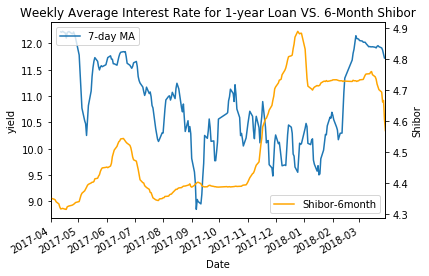

In [34]:
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()


#df_1_avg.plot(ax=ax1, y='Rate', legend=True)
ma_7 = df_sh_712_avg['Rate'].rolling(window=7).mean()
ma_7.plot(ax=ax1, y='Rate', legend=True)
ax1.legend(['7-day MA'], loc='upper left')
#sh_7_rolling = sh_7.rolling(window=3).mean()
#sh_7_rolling.plot(ax=ax2, y='Shibor', legend=True,color='orange')
sh_6.plot(ax=ax2, y='Shibor', legend=True,color='orange')
ax2.legend(['Shibor-6month'], loc='lower right')
plt.title('Weekly Average Interest Rate for 1-year Loan VS. 6-Month Shibor')
ax1.set_ylabel('yield')
ax2.set_ylabel('Shibor')
plt.savefig('12-Month Loan_3.png', bbox_inches='tight')

loan over 1 year

In [20]:
df_13 = pd.read_excel('/Users/binsair/Desktop/FT/rate index/month_13.xlsx')
mask_13 = (df_13['Date'] > '2017-3-31') & (df_13['Date'] <= '2018-3-31')
df_13m = df_13.loc[mask_13]
df_13_avg = df_13m.groupby('Date').apply(lambda x: np.average(x['Rate'], weights=x['Value(Yuan)']))

In [35]:
#all data
df_13_avg = df_13.groupby('Date').apply(lambda x: np.average(x['Rate'], weights=x['Value(Yuan)']))

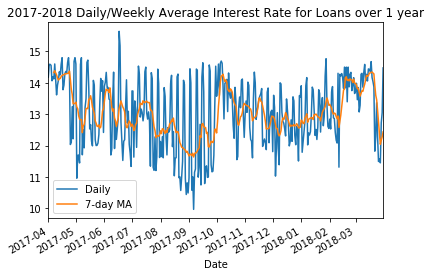

In [36]:
%matplotlib inline
df_13_avg.plot()
ma_7 = df_13_avg.rolling(window=7).mean()
ma_7.plot()
plt.legend(['Daily', '7-day MA'], loc='best')
plt.title('2017-2018 Daily/Weekly Average Interest Rate for Loans over 1 year')
plt.savefig('13-Month Loan_1.png', bbox_inches='tight')

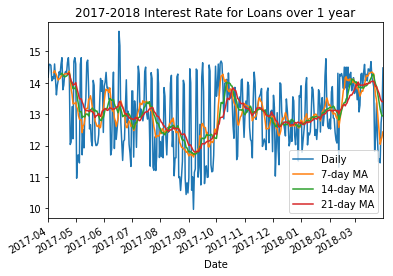

In [37]:
%matplotlib inline
df_13_avg.plot()
ma_7 = df_13_avg.rolling(window=7).mean()
ma_7.plot()
ma_14 = df_13_avg.rolling(window=14).mean()
ma_14.plot()
ma_21 = df_13_avg.rolling(window=21).mean()
ma_21.plot()
plt.legend(['Daily', '7-day MA', '14-day MA', '21-day MA'], loc='best')
plt.title('2017-2018 Interest Rate for Loans over 1 year')
plt.savefig('13-Month Loan_2.png', bbox_inches='tight')

In [36]:
df_13_avg = df_13_avg.to_frame().reset_index()
df_13_avg.columns = ['Date', 'Rate']

In [37]:
df_13_avg.to_csv('over_1_year_loan', sep='\t')

In [38]:

df_sh_13_avg = df_13_avg.merge(df_sh)
df_sh_13_avg.index = df_sh_13_avg['Date']

In [39]:
[crosscorr(sh_12, df_sh_13_avg['Rate'].rolling(window=7).mean(), lag=i)\
                for i in range(10)]##not very correlated

[0.19089032286986471,
 0.19585894927049396,
 0.19948425176213974,
 0.20154760296033147,
 0.20147471842893286,
 0.1996397270329589,
 0.19581295617860051,
 0.19126095958315992,
 0.18602509988654867,
 0.18088982978162738]

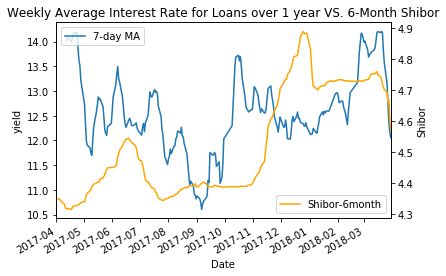

In [40]:
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()


#df_1_avg.plot(ax=ax1, y='Rate', legend=True)
ma_7 = df_sh_13_avg['Rate'].rolling(window=7).mean()
ma_7.plot(ax=ax1, y='Rate', legend=True)
ax1.legend(['7-day MA'], loc='upper left')
#sh_7_rolling = sh_7.rolling(window=3).mean()
#sh_7_rolling.plot(ax=ax2, y='Shibor', legend=True,color='orange')
sh_6.plot(ax=ax2, y='Shibor', legend=True,color='orange')
ax2.legend(['Shibor-6month'], loc='lower right')
plt.title('Weekly Average Interest Rate for Loans over 1 year VS. 6-Month Shibor')
ax1.set_ylabel('yield')
ax2.set_ylabel('Shibor')
plt.savefig('13-Month Loan_3.png', bbox_inches='tight')

total loans

In [2]:
df_t = pd.read_excel('/Users/binsair/Desktop/FT/rate index/Total_processed.xlsx')
mask_t = (df_t['Date'] > '2017-3-31') & (df_t['Date'] <= '2018-3-31')
df_tm = df_t.loc[mask_t]
df_t_avg = df_tm.groupby('Date').apply(lambda x: np.average(x['Rate'], weights=x['Value(Yuan)']))

In [5]:
#all data
df_t_avg = df_t.groupby('Date').apply(lambda x: np.average(x['Rate'], weights=x['Value(Yuan)']))

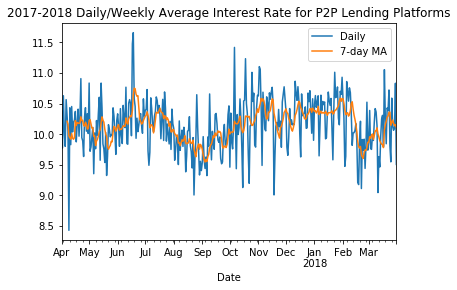

In [42]:
%matplotlib inline
df_t_avg.plot()
ma_7 = df_t_avg.rolling(window=7).mean()
ma_7.plot()
plt.legend(['Daily', '7-day MA'], loc='best')
plt.title('2017-2018 Daily/Weekly Average Interest Rate for P2P Lending Platforms')
plt.savefig('total Loan_1.png', bbox_inches='tight')

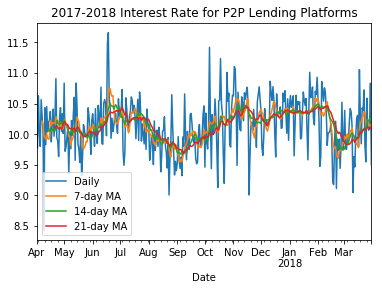

In [43]:
%matplotlib inline
df_t_avg.plot()
ma_7 = df_t_avg.rolling(window=7).mean()
ma_7.plot()
ma_14 = df_t_avg.rolling(window=14).mean()
ma_14.plot()
ma_21 = df_t_avg.rolling(window=21).mean()
ma_21.plot()
plt.legend(['Daily', '7-day MA', '14-day MA', '21-day MA'], loc='best')
plt.title('2017-2018 Interest Rate for P2P Lending Platforms')
plt.savefig('toal Loan_2.png', bbox_inches='tight')

In [6]:
df_t_avg = df_t_avg.to_frame().reset_index()
df_t_avg.columns = ['Date', 'Rate']

In [7]:
df_t_avg.to_csv('total_loan', sep='\t')

In [44]:

df_sh_t_avg = df_t_avg.merge(df_sh)
df_sh_t_avg.index = df_sh_t_avg['Date']

In [45]:
[crosscorr(sh_6, df_sh_t_avg['Rate'].rolling(window=7).mean(), lag=i)\
                for i in range(10)]##corr = 0.5

[0.49226434586730622,
 0.49678270883999415,
 0.50174092658913994,
 0.50721170810942173,
 0.51398883964112196,
 0.52233948808553565,
 0.53199545164828432,
 0.54274157536970347,
 0.55368614211935818,
 0.56406199893808717]

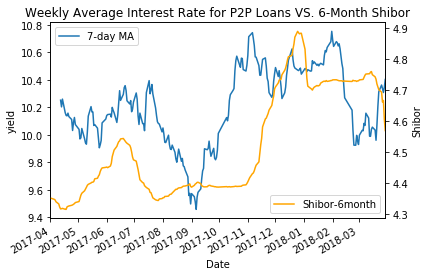

In [46]:
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()


#df_1_avg.plot(ax=ax1, y='Rate', legend=True)
ma_7 = df_sh_t_avg['Rate'].rolling(window=7).mean()
ma_7.plot(ax=ax1, y='Rate', legend=True)
ax1.legend(['7-day MA'], loc='upper left')
#sh_7_rolling = sh_7.rolling(window=3).mean()
#sh_7_rolling.plot(ax=ax2, y='Shibor', legend=True,color='orange')
sh_6.plot(ax=ax2, y='Shibor', legend=True,color='orange')
ax2.legend(['Shibor-6month'], loc='lower right')
plt.title('Weekly Average Interest Rate for P2P Loans VS. 6-Month Shibor')
ax1.set_ylabel('yield')
ax2.set_ylabel('Shibor')
plt.savefig('total Loan_3.png', bbox_inches='tight')

In [ ]:
##overal trends among loans with different maturities

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_1 = pd.read_excel('/Users/binsair/Desktop/FT/rate index/month_1.xlsx')
mask_1 = (df_1['Date'] > '2017-3-31') & (df_1['Date'] <= '2018-3-31')
df_1m = df_1.loc[mask_1]
df_1_avg = df_1m.groupby('Date').apply(lambda x: np.average(x['Rate'], weights=x['Value(Yuan)']))